# K-Means Clustering: A General Template

**Objective:** Use this notebook to discover hidden groups in your own dataset using K-means clustering. 

**How to Use This Template:**
1.  **Upload your data:** Make sure your dataset is a CSV file and is in the same directory as this notebook.
2.  **Follow the `ACTION REQUIRED` prompts:** In the code cells, you will find comments that start with `ACTION REQUIRED`. You will need to change these parts of the code to fit your specific dataset.
3.  **Run the cells:** Run each cell in order to see the results.

## 1. Setup and Loading Data

First, we import the necessary libraries and load your dataset into a pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# ACTION REQUIRED: Change 'your_dataset.csv' to the name of your data file.
file_path = '../data/penguins.csv'
df = pd.read_csv(file_path)

In [6]:
# Let's look at the first few rows of your data
print("First 5 rows of the dataset:")
print(df.head())

# Get some basic information about the columns
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


## 2. Data Exploration and Preparation

Now, we need to choose which columns (features) from your dataset you want to use for clustering. You should choose numerical columns that you think might help in forming distinct groups.

In [7]:
# ACTION REQUIRED: 
# 1. In the `feature_columns` list, replace 'feature_1', 'feature_2', etc., with the names of the numerical columns you want to use for clustering.
#    You can use two, three, or more features.
# 2. In the `visualization_columns` list, pick TWO features from your list above that you want to use for plotting the clusters later. 
feature_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'] 
visualization_columns = ['culmen_length_mm', 'culmen_depth_mm']

In [8]:
# ACTION REQUIRED (OPTIONAL):
# If your dataset has a column with labels you want to use for validation at the end (like 'species', 'genre', 'type'), 
# put its name here. If not, set it to None.
#label_column = 'column_with_known_labels' # or None

# --- No changes needed below this line in this cell ---

# Create a new DataFrame with only the features we need
features = df[feature_columns]

# Drop rows with any missing values in our selected features
features_clean = features.dropna()
print(f"Original number of rows: {len(features)}")
print(f"Number of rows after dropping missing values: {len(features_clean)}")

# Scale the features so they have a similar range
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clean)

Original number of rows: 335
Number of rows after dropping missing values: 335


### Visualize the Unlabeled Data

Let's create a scatter plot of the two features you chose for visualization. At this stage, we don't use any labels. The goal is to see if you can spot any potential groups just by looking at the data.

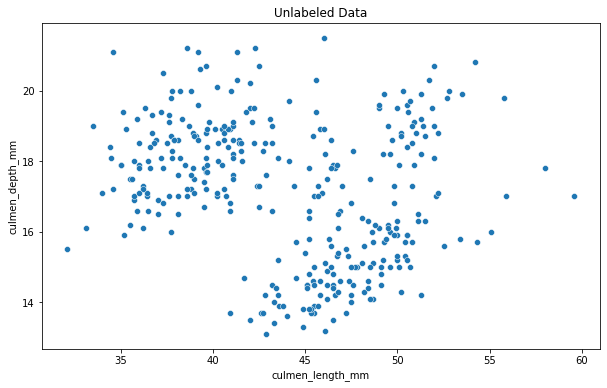

In [9]:
# --- No changes needed below this line in this cell ---
x_axis = visualization_columns[0]
y_axis = visualization_columns[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_clean, x=x_axis, y=y_axis)
plt.title('Unlabeled Data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

## 3. How Many Clusters? The Elbow Method

Now we need to decide how many clusters (K) to look for. The Elbow Method helps us find a good value for K by running the algorithm for a range of K values and plotting the 'inertia'. We look for the 'elbow' point where the plot starts to level off.

In [11]:
# --- No changes needed below this line in this cell ---
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(features_scaled)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

## 4. Applying K-Means Clustering

Based on the elbow plot, decide on the best number of clusters for your data and run the algorithm.

In [ ]:
# ACTION REQUIRED: Change the value of 'optimal_k' to the number of clusters you chose from the elbow plot.
optimal_k = 3

# --- No changes needed below this line in this cell ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(features_scaled)

# Add the cluster labels back to our clean DataFrame
features_clean['cluster'] = cluster_labels

print(f"Successfully created {optimal_k} clusters.")

## 5. Visualizing and Interpreting the Clusters

Let's visualize the clusters we just created. The plot will be colored based on the cluster assigned by the algorithm. We will also plot the cluster centers (centroids).

In [ ]:
# --- No changes needed below this line in this cell ---
x_axis = visualization_columns[0]
y_axis = visualization_columns[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_clean, x=x_axis, y=y_axis, hue='cluster', palette='viridis')

# To plot the centroids, we need to un-scale them back to the original data range
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Get the correct index for the visualization columns from the original feature list
x_axis_index = feature_columns.index(x_axis)
y_axis_index = feature_columns.index(y_axis)

plt.scatter(centroids[:, x_axis_index], centroids[:, y_axis_index], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend(title='Discovered Cluster')
plt.show()

### What Do These Clusters Mean?

Let's calculate the average values of your features for each cluster. This will help you understand what makes each cluster different.

In [ ]:
# --- No changes needed below this line in this cell ---
cluster_summary = features_clean.groupby('cluster').mean()
print("Average Feature Values for Each Cluster:")
print(cluster_summary)

**Discussion:**
- Based on the summary table, can you describe a 'typical' member of each cluster?
- What story do these clusters tell about your data?

## 6. Validation (Optional)

If your original dataset had a column with known labels (like 'species', 'genre', etc.), you can run the cell below to see how well your discovered clusters match those labels.

In [ ]:
# --- No changes needed below this line in this cell ---
# This cell will only run if you defined a 'label_column' and it exists in the DataFrame.
if label_column and label_column in df.columns:
    # Add the original labels to our clustered data
    validation_df = features_clean.copy()
    validation_df[label_column] = df.loc[features_clean.index, label_column]

    # Create a crosstab to compare clusters and the known labels
    crosstab = pd.crosstab(validation_df['cluster'], validation_df[label_column])
    print(f"Comparison of Clusters and '{label_column}':")
    print(crosstab)
else:
    print("No label column was specified for validation, or the column was not found.")

**Final Analysis:**
- If you ran the validation, how well did the clusters match the known labels?
- Did the algorithm successfully discover the underlying groups in your data?